# Assignment 5

# Collaboration by Minghao Li, Dongke Wang

In [1]:
pip install powerlaw

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import scipy.stats as sp
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import powerlaw
import math

In [3]:
g1 = nx.read_gml('graph_amazon.gml')
g2 = nx.read_gml('graph_escort.gml')
g3 = nx.read_gml('graph_internet.gml')

# A05.1 parameter estimation and model selection

In [4]:
#degree distribution
def degree_distri(g):
    k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
    my_bins = np.logspace(np.log10(min(k)),np.log10(max(k) +1), 30 ) 
    _ = plt.hist(k, bins = my_bins,density = True)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('degree')
    plt.ylabel('density')

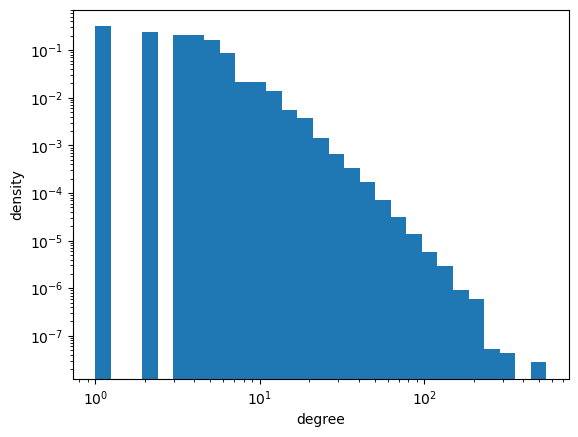

In [5]:
degree_distri(g1)

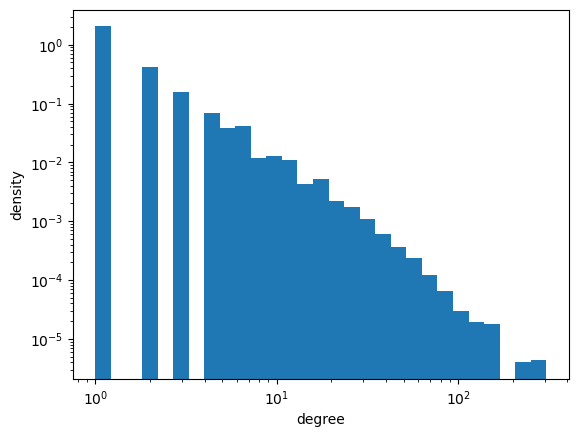

In [6]:
degree_distri(g2)

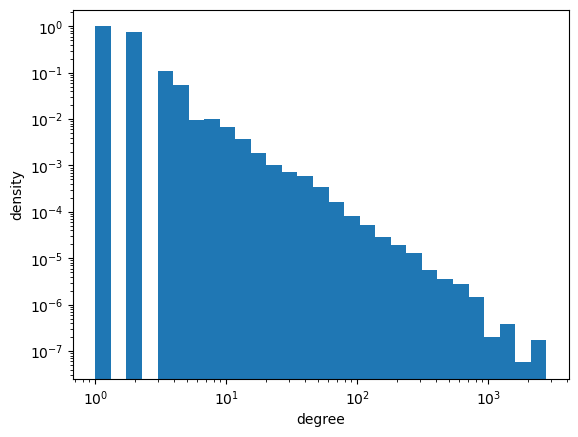

In [7]:
degree_distri(g3)

In [8]:
#average degree
def average_de(g):
    avg_degree = np.average(np.array([ g.degree()[i] for i in g.nodes() ]))
    return avg_degree

In [9]:
average_de(g1)

5.529855493141971

In [10]:
average_de(g2)

4.667543335325762

In [11]:
average_de(g3)

6.197750352406432

In [12]:
def myfunc(x,alpha):
    return x**(-alpha)

In [13]:
def gamma(g):
    k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
    fit = powerlaw.Fit(k)
    gamma = fit.power_law.alpha
    D = fit.power_law.D
    sigma = fit.power_law.sigma

    print(f"gamma = {gamma}\nminimal Kolmogorov-Smirnov distance = {D}\nstandard error = {sigma}")

In [14]:
gamma(g1)

Calculating best minimal value for power law fit
gamma = 4.065660034466614
minimal Kolmogorov-Smirnov distance = 0.019208542339462675
standard error = 0.09699319113242895


In [15]:
gamma(g2)

Calculating best minimal value for power law fit
gamma = 2.9544249080995764
minimal Kolmogorov-Smirnov distance = 0.03274062923984844
standard error = 0.07919729392592209


In [16]:
gamma(g3)

Calculating best minimal value for power law fit
gamma = 2.112191339113011
minimal Kolmogorov-Smirnov distance = 0.027242875916969653
standard error = 0.0366878070312722


In [17]:
def pl(g):
    k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
    fit = powerlaw.Fit(k)
    spacing = np.linspace(min(k),max(k),len(k))
    fit.power_law.plot_pdf(color='r')
    powerlaw.plot_pdf(k,color='b',marker='o')
    plt.plot(spacing,myfunc(spacing,4))
    plt.show()

Calculating best minimal value for power law fit


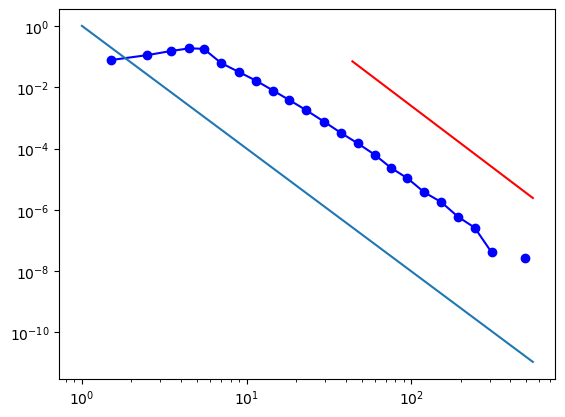

In [18]:
pl(g1)

Calculating best minimal value for power law fit


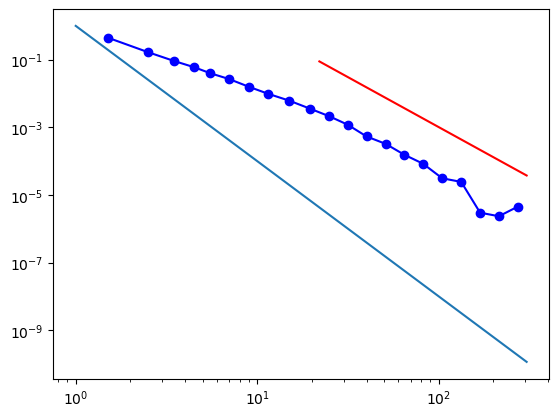

In [19]:
pl(g2)

Calculating best minimal value for power law fit


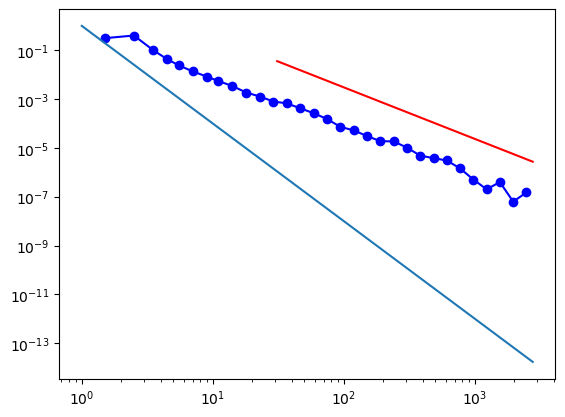

In [20]:
pl(g3)

In [21]:
from scipy.special import factorial
from scipy.stats import poisson

In [22]:
def compare(g):
    def pos(g):  
        k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
        lam = average_de(g)
        y = poisson.pmf(k, lam)
        plt.plot(k,y)
        
    def exp(g):
        k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
        lam = average_de(g)
        y = np.exp(-k/lam)/lam
        plt.plot(k,y)
    k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
    fit = powerlaw.Fit(k)
    spacing = np.linspace(min(k),max(k),len(k))
    fit.power_law.plot_pdf(color='r')
    powerlaw.plot_pdf(k,color='b',marker='o')
    pos(g)
    exp(g)
    plt.ylim(10**(-8),1)
    plt.show()

Calculating best minimal value for power law fit


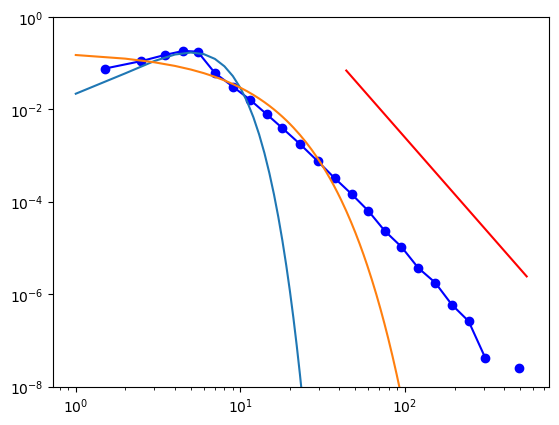

In [23]:
compare(g1)

Calculating best minimal value for power law fit


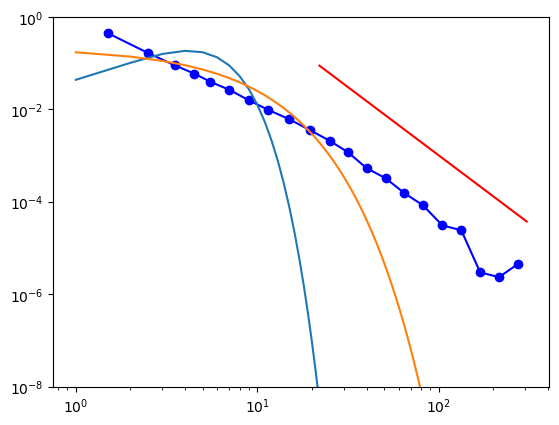

In [24]:
compare(g2)

Calculating best minimal value for power law fit


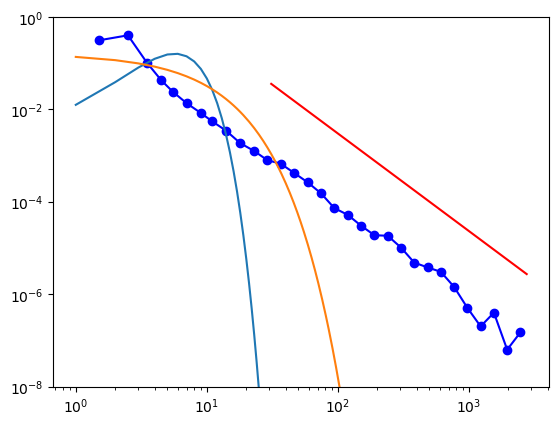

In [25]:
compare(g3)

In [26]:
def se(g):
    
    k = np.sort(np.asarray([d for d in dict(g.degree()).values()]), )
    lam = average_de(g)
    y = (np.exp(-lam) * lam**k / factorial(k))
    se1 = poisson.std(lam)
    
    se2 = lam
    
    fit = powerlaw.Fit(k)
    sigma = fit.power_law.sigma
    print(f"Standard error of poisson distribution is: {se1}\nStandard error of exponential distribution is: {se2}\nStandard error of power-law is: {sigma}")

In [27]:
se(g1)

Calculating best minimal value for power law fit
Standard error of poisson distribution is: 2.351564477776863
Standard error of exponential distribution is: 5.529855493141971
Standard error of power-law is: 0.09699319113242895


/var/folders/r8/3kvw3g216rbdrc09w_jwnr840000gn/T/ipykernel_6714/1004454048.py:5: RuntimeWarning: overflow encountered in power
  y = (np.exp(-lam) * lam**k / factorial(k))
/var/folders/r8/3kvw3g216rbdrc09w_jwnr840000gn/T/ipykernel_6714/1004454048.py:5: RuntimeWarning: invalid value encountered in true_divide
  y = (np.exp(-lam) * lam**k / factorial(k))


In [28]:
se(g2)

Calculating best minimal value for power law fit
Standard error of poisson distribution is: 2.1604497993070244
Standard error of exponential distribution is: 4.667543335325762
Standard error of power-law is: 0.07919729392592209


In [29]:
se(g3)

Calculating best minimal value for power law fit
Standard error of poisson distribution is: 2.489528138504651
Standard error of exponential distribution is: 6.197750352406432
Standard error of power-law is: 0.0366878070312722


/var/folders/r8/3kvw3g216rbdrc09w_jwnr840000gn/T/ipykernel_6714/1004454048.py:5: RuntimeWarning: overflow encountered in power
  y = (np.exp(-lam) * lam**k / factorial(k))
/var/folders/r8/3kvw3g216rbdrc09w_jwnr840000gn/T/ipykernel_6714/1004454048.py:5: RuntimeWarning: invalid value encountered in true_divide
  y = (np.exp(-lam) * lam**k / factorial(k))


According to the standard error, power-law's standard error is the smalledst among all graphs. So, we think power-law  is more likely to describe the data.

It means that Amazon products is a scale-free network, and the number of connections to each node of the network is an increasing function of the probability of this node generating new connections, which means that if a product is bought together with more other products, the greater the probability that it will be bought together with other products in the future.

# A05.2 Barabási-Albert model

In [30]:
glist = []
nodelist = [50,100,500,1000,5000]
for nd in nodelist:
    g = nx.barabasi_albert_graph(nd,3)
    glist.append(g)

In [31]:
def properties(g):
    ac = nx.average_clustering(g)
    ast = nx.degree_assortativity_coefficient(g)
    sp = nx.average_shortest_path_length(g)
    dm = nx.diameter(g)
    print(f"average clustering coefficient = {ac}\nassortativity = {ast}\naverage shortest path length = {sp}\ndiameter = {dm}")

In [32]:
i = 0
for g in glist:
    i = i+1
    print(f"g{i}'properties:")
    properties(g)
    print('--------------------')

g1'properties:
average clustering coefficient = 0.15478224699277326
assortativity = -0.15427503736920786
average shortest path length = 2.317551020408163
diameter = 4
--------------------
g2'properties:
average clustering coefficient = 0.10016553519094236
assortativity = -0.11654685278936885
average shortest path length = 2.65010101010101
diameter = 5
--------------------
g3'properties:
average clustering coefficient = 0.05895027199370707
assortativity = -0.0735415450251707
average shortest path length = 3.175703406813627
diameter = 5
--------------------
g4'properties:
average clustering coefficient = 0.02675661922700389
assortativity = -0.06447297016687871
average shortest path length = 3.4987927927927926
diameter = 6
--------------------
g5'properties:
average clustering coefficient = 0.008570938136300412
assortativity = -0.0439615108210698
average shortest path length = 4.050074014802961
diameter = 7
--------------------


In [33]:
def randGra(g):
    grnd = nx.algorithms.smallworld.random_reference(g,niter =20, connectivity=False)
    return grnd

In [34]:
grlist = []
for g in glist:
    rg = randGra(g)
    grlist.append(rg)

In [35]:
def acc(g,gr):
    aclist = []
    raclist = []
    for gra in g:
        ac = nx.average_clustering(gra)
        aclist.append(ac)
    for gra in gr:
        ac = nx.average_clustering(gra)
        raclist.append(ac)
    plt.plot(nodelist,aclist)
    plt.plot(nodelist,raclist)
    plt.title("average clustering coefficient")
    plt.xscale('log')
    plt.show()

In [36]:
def dac(g,gr):
    daclist = []
    rdaclist = []
    for gra in g:
        dac = nx.degree_assortativity_coefficient(gra)
        daclist.append(dac)
    for gra in gr:
        dac = nx.degree_assortativity_coefficient(gra)
        rdaclist.append(dac)
    plt.plot(nodelist,daclist)
    plt.plot(nodelist,rdaclist)
    plt.title("assortativity")
    plt.xscale('log')
    plt.show()

In [37]:
def spl(g,gr):
    spllist = []
    rspllist = []
    for gra in g:
        spl = nx.average_shortest_path_length(gra)
        spllist.append(spl)
    for gra in gr:
        spl = nx.average_shortest_path_length(gra)
        rspllist.append(spl)
    plt.plot(nodelist,spllist)
    plt.plot(nodelist,rspllist)
    plt.title("average shortest path length")
    plt.xscale('log')
    plt.show()

In [38]:
def dia(g,gr):
    dialist = []
    rdialist = []
    for gra in g:
        dia = nx.diameter(gra)
        dialist.append(dia)
    for gra in gr:
        dia = nx.diameter(gra)
        rdialist.append(dia)
    plt.plot(nodelist,dialist)
    plt.plot(nodelist,rdialist)
    plt.title("diameter")
    plt.xscale('log')
    plt.show()

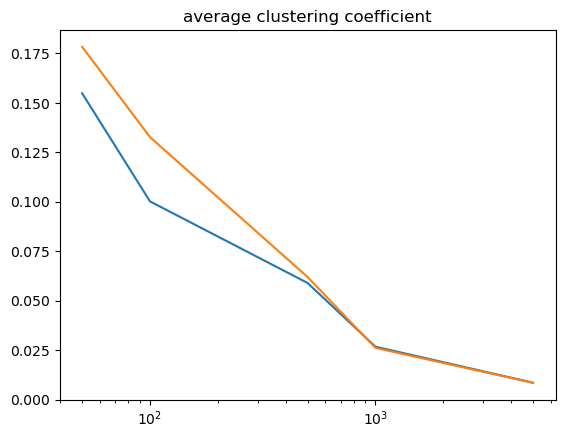

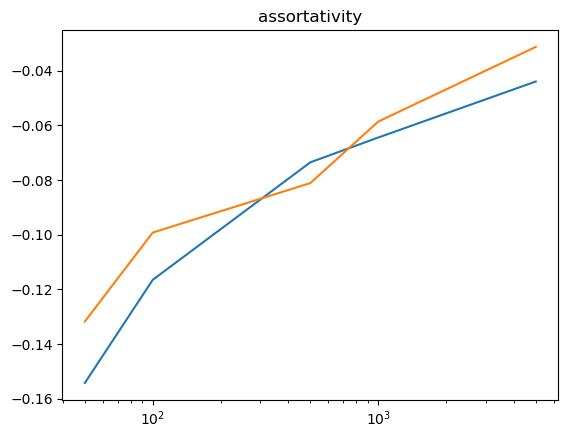

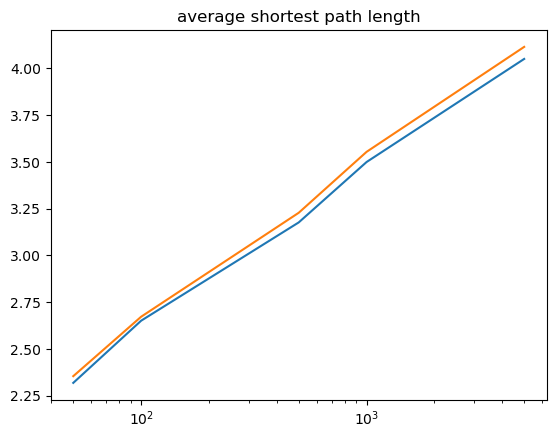

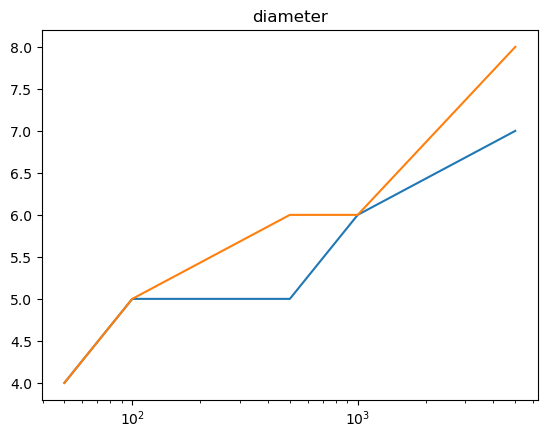

In [39]:
acc(glist,grlist)
dac(glist,grlist)
spl(glist,grlist)
dia(glist,grlist)

Average shortest path length stay unchanged. Becaus after randomisation, the number of nodes did not change then the average shortest path lenth did not change. The average path length depends on the system size but does not change drastically with it. Small world network theory predicts that the average path length changes proportionally to log n, where n is the number of nodes in the network.

# A05.3 Barabási-Albert model (2)

In [40]:
glist = []
listofm = [2,3,4,5]
for mm in listofm:
    g = nx.barabasi_albert_graph(500,mm)
    glist.append(g)

network with m = 2


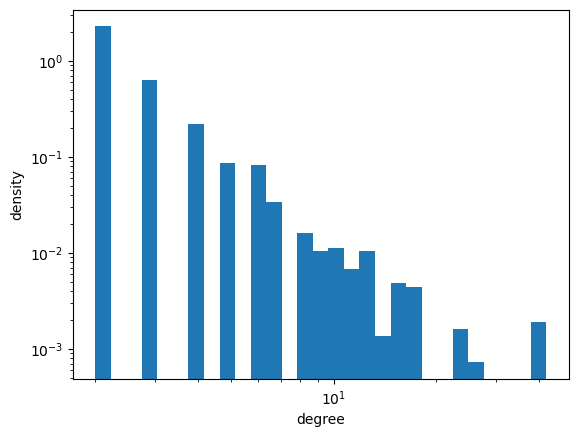

In [41]:
print('network with m = 2')
degree_distri(glist[0])

network with m = 3


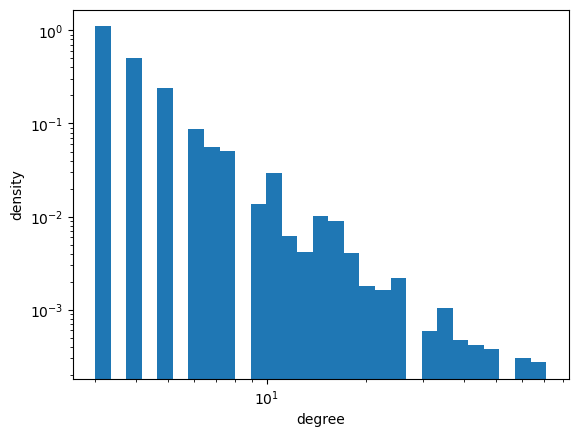

In [42]:
print('network with m = 3')
degree_distri(glist[1])

network with m = 4


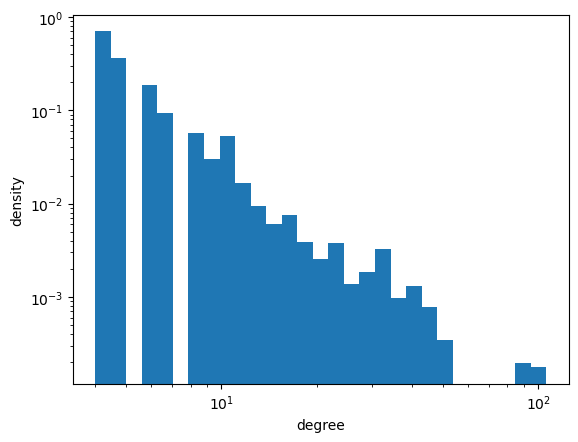

In [43]:
print('network with m = 4')
degree_distri(glist[2])

network with m = 5


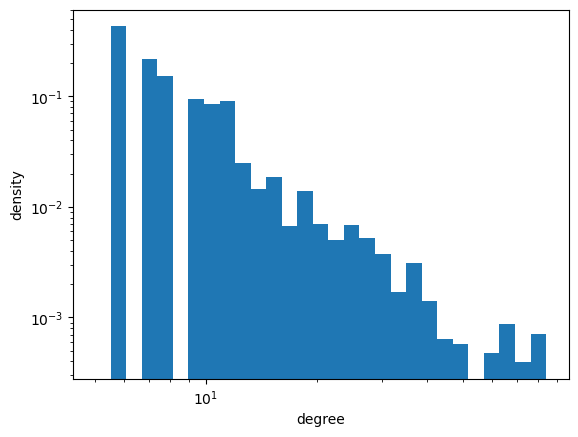

In [44]:
print('network with m = 5')
degree_distri(glist[3])

In [45]:
for index in range(len(glist)):
    print(f"network with m = {index+2}: ")
    gamma(glist[index])
    print("------------------")

network with m = 2: 
Calculating best minimal value for power law fit
gamma = 3.151751719634377
minimal Kolmogorov-Smirnov distance = 0.07126886733714174
standard error = 0.34906022187965074
------------------
network with m = 3: 
Calculating best minimal value for power law fit
gamma = 3.188819997281683
minimal Kolmogorov-Smirnov distance = 0.06222264704038938
standard error = 0.12451761914422746
------------------
network with m = 4: 
Calculating best minimal value for power law fit
gamma = 2.965267232986578
minimal Kolmogorov-Smirnov distance = 0.05040360117968107
standard error = 0.14985022167598352
------------------
network with m = 5: 
Calculating best minimal value for power law fit
gamma = 3.0976723074320556
minimal Kolmogorov-Smirnov distance = 0.04652512991982605
standard error = 0.14142503811636437
------------------


In [46]:
def alp(g):
    alplist = []
    for gra in g:
        k = np.sort(np.asarray([d for d in dict(gra.degree()).values()]), )
        fit = powerlaw.Fit(k)
        alp = fit.power_law.alpha
        alplist.append(alp)
    plt.plot(listofm,alplist)
    plt.show()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


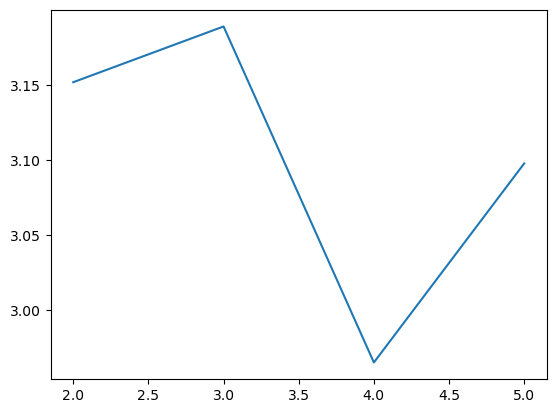

In [47]:
alp(glist)